In [82]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Print loss curves

In [138]:
def create_loss_plots(name):
    def create_df(lines):
        data = [[float(x) for x in re.findall('([-]?\d[\d.]*)',l)[1:3]] for l in lines]
        return pd.DataFrame(data, columns = ['Train Loss','Validation Loss'], index = range(1, len(lines)+1))

    with open('Results/GNN3Sizes/'+name+'.txt') as f:
        lines = f.readlines() 

    loss_list = [x for x in lines if x.startswith('Epoch')]
    cuts = [i for i, x in enumerate([x.startswith('Epoch  1:') for x in loss_list]) if x] + [len(loss_list)]
    split_loss_list = [loss_list[cuts[i]:cuts[i+1]] for i in range(len(cuts)-1)]
    df_list = [create_df(ll) for ll in split_loss_list]
    Optimums = [(df['Validation Loss'].idxmin(),df['Validation Loss'].min()) for df in df_list]

    NN_sizes = [int(re.search("\d+", x)[0]) for x in lines if x.startswith(') ')]
    
    # Plot
    names = [f'Large GNN ({NN_sizes[0]} params)', f'Medium GNN ({NN_sizes[1]} params)', f'Small GNN ({NN_sizes[2]} params)']
    fig, axs = plt.subplots(1, len(df_list), sharey = True, figsize=(22,7))
    fig.suptitle('Loss across epochs for ' + name, fontsize = 30)
    for i in range(len(df_list)):
        df_list[i].plot(ax = axs[i])
        fig.subplots_adjust(top=0.9)
        fig.tight_layout()
        axs[i].set_title(names[i], fontsize = 22)
        axs[i].set_xlabel('Epoch', fontsize = 20)
        axs[i].legend(fontsize = 20)
        axs[i].plot(*Optimums[i], 'o', color='k', markerfacecolor='none')
        axs[i].tick_params(axis='both', which='major', labelsize=16)
    axs[0].set_ylim((min([df['Train Loss'].min() for df in df_list])*1.02,max([df['Validation Loss'].max() for df in df_list])+0.02))
    axs[0].set_ylabel('Loss', fontsize = 20)

    plt.savefig('../TeX/graphics/Appendix/'+name+'.png', bbox_inches = "tight", dpi = 150)

    plt.show()

    return

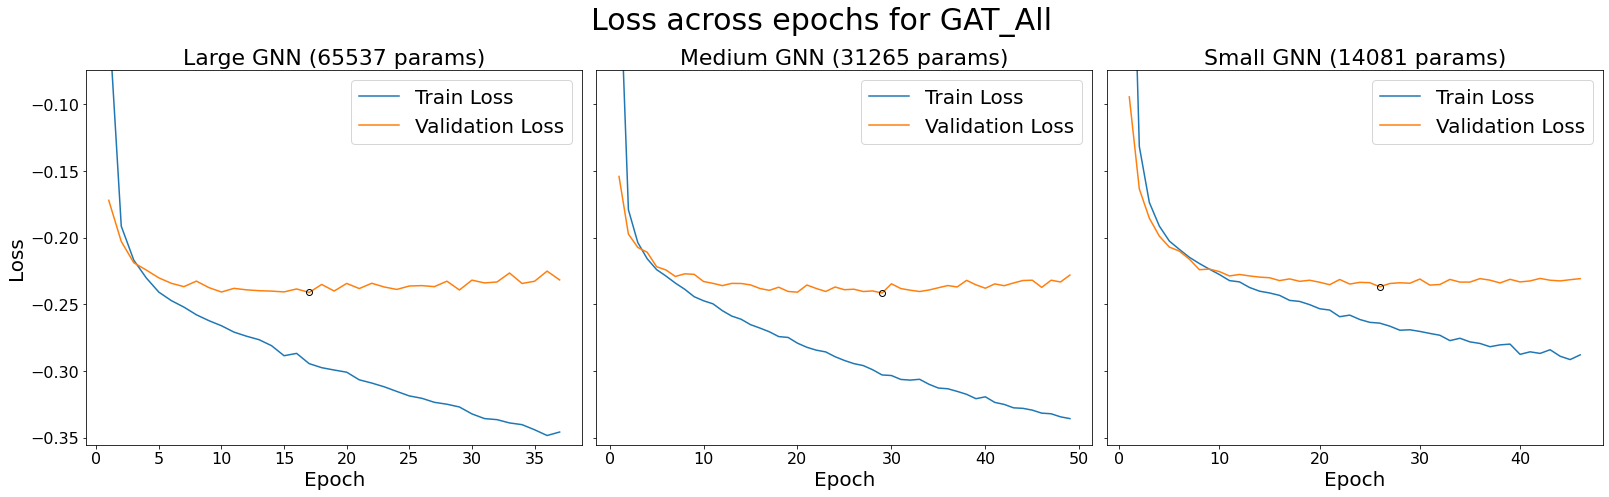

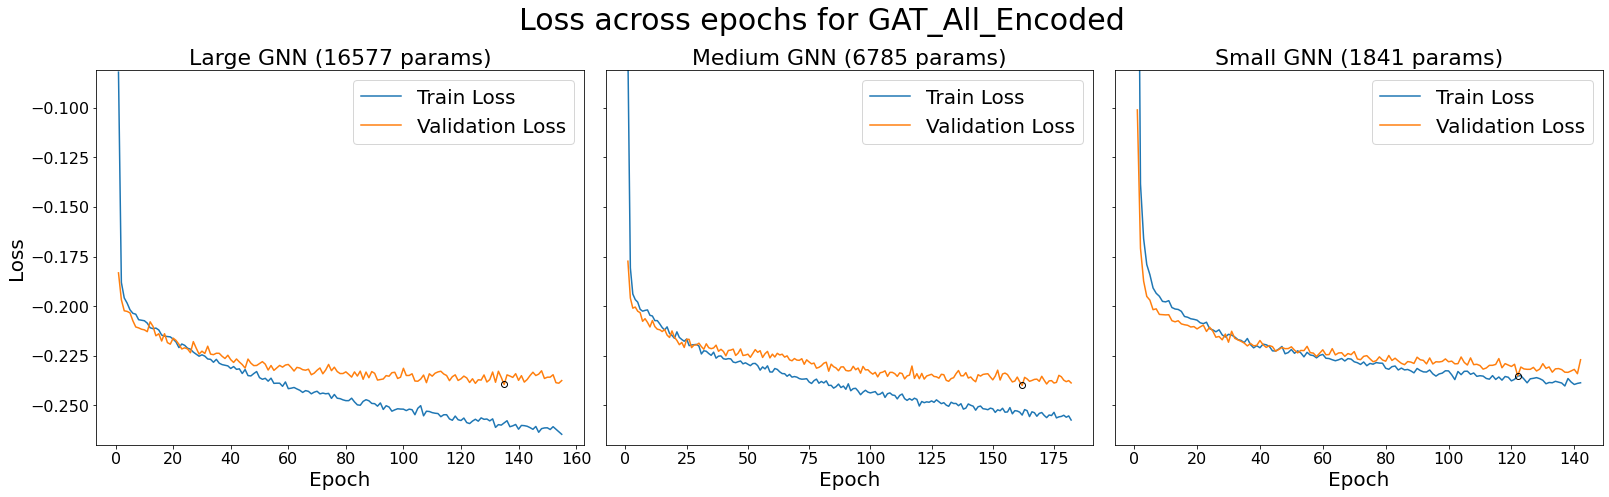

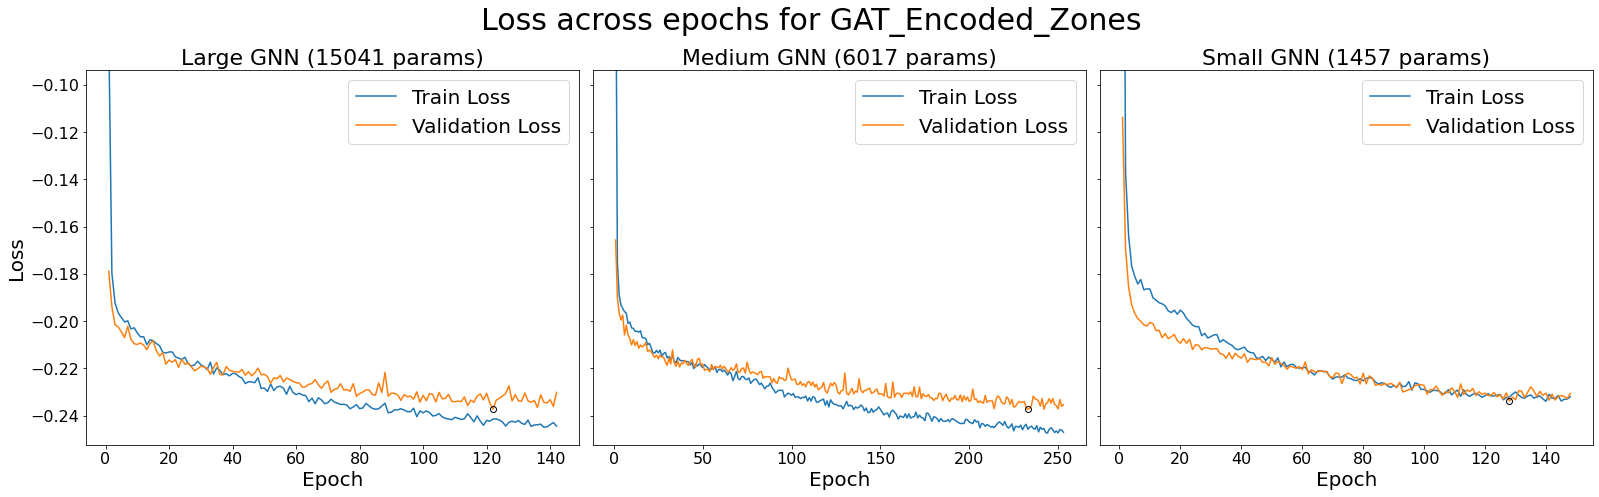

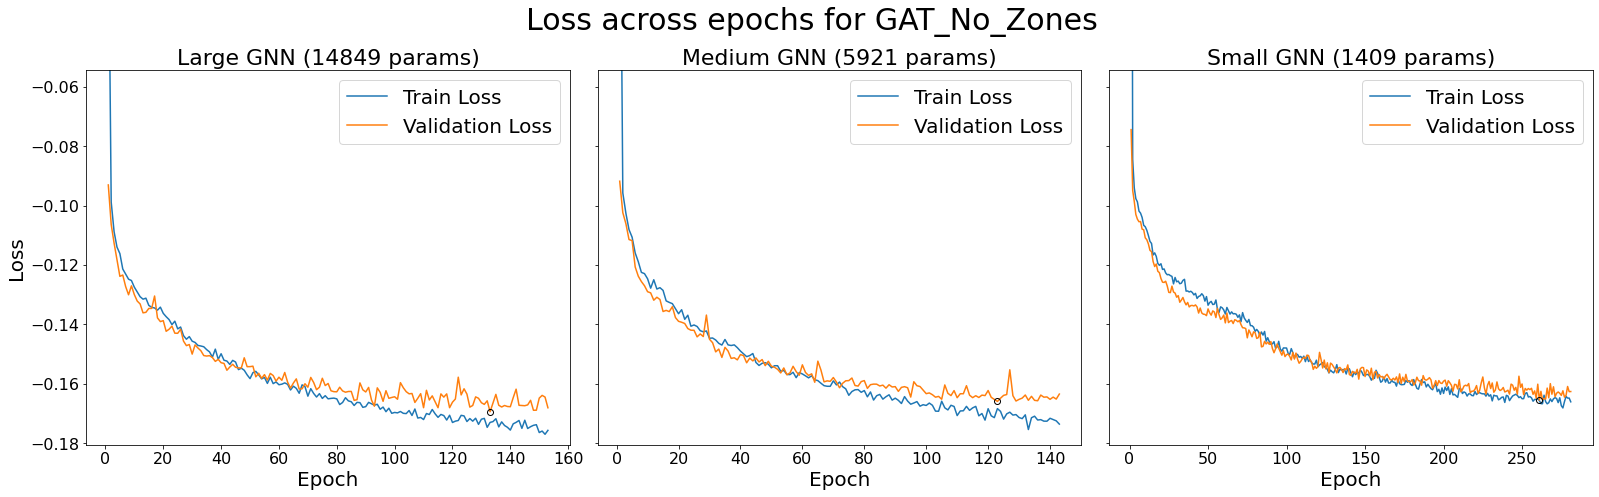

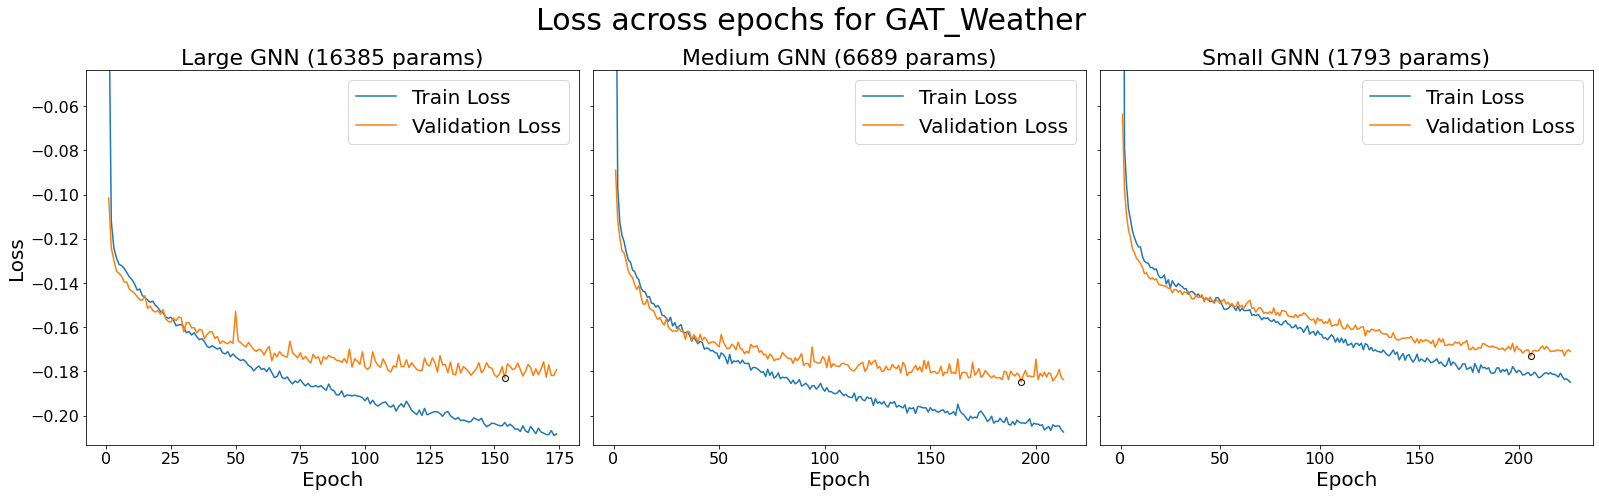

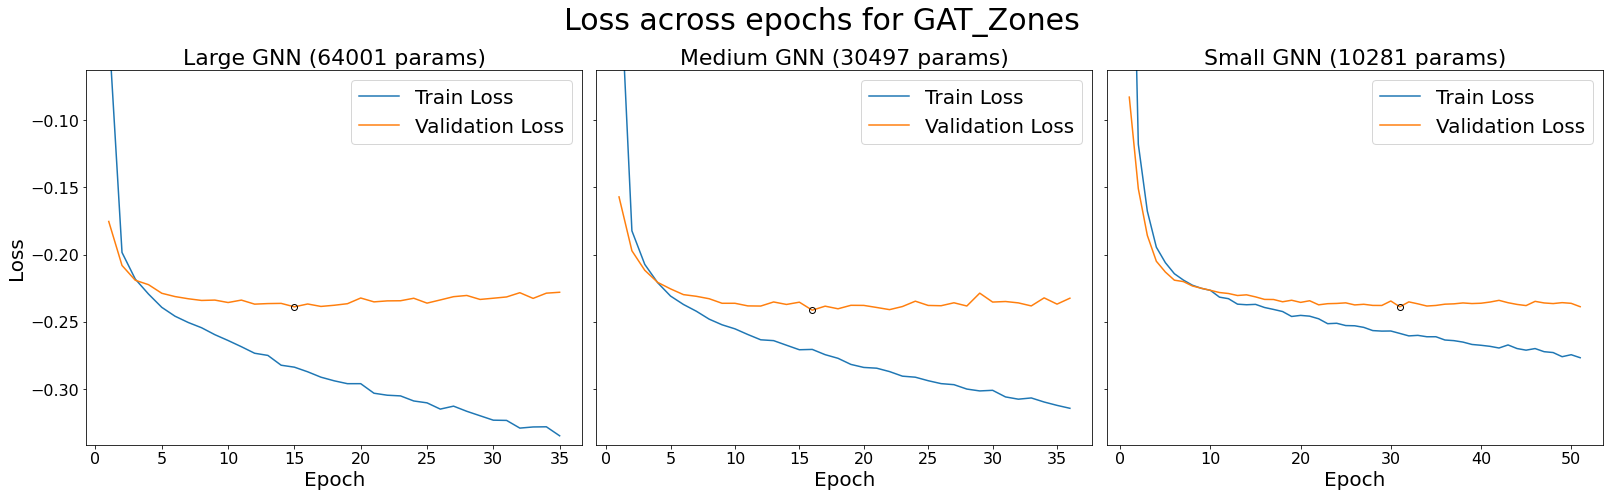

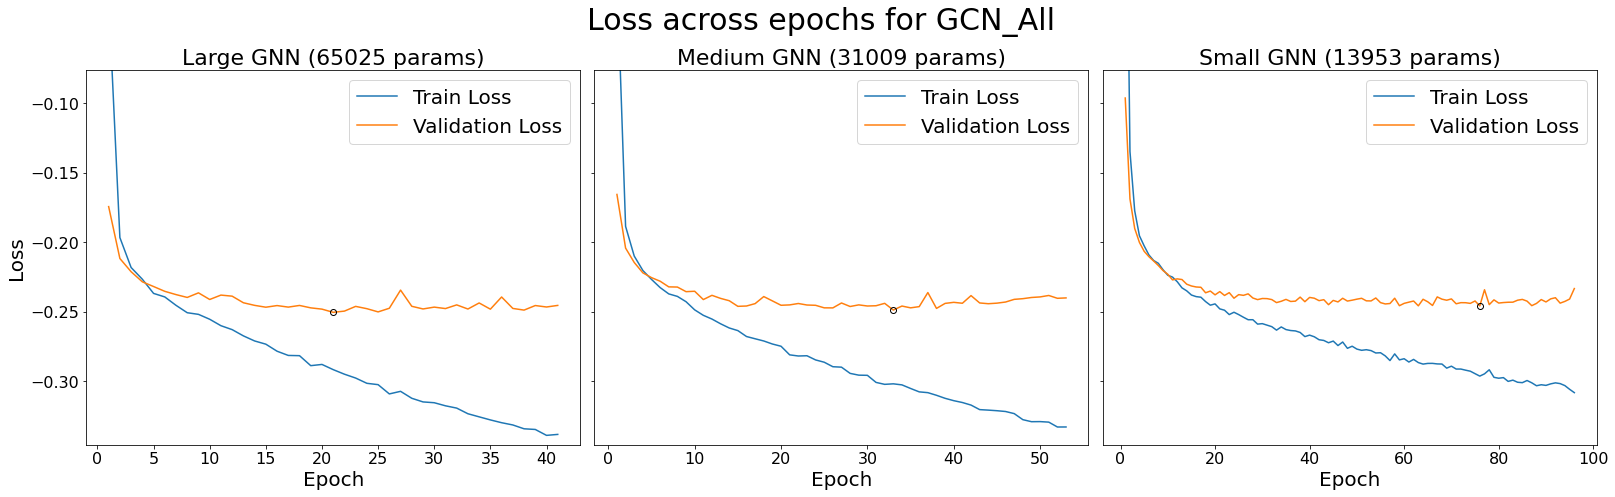

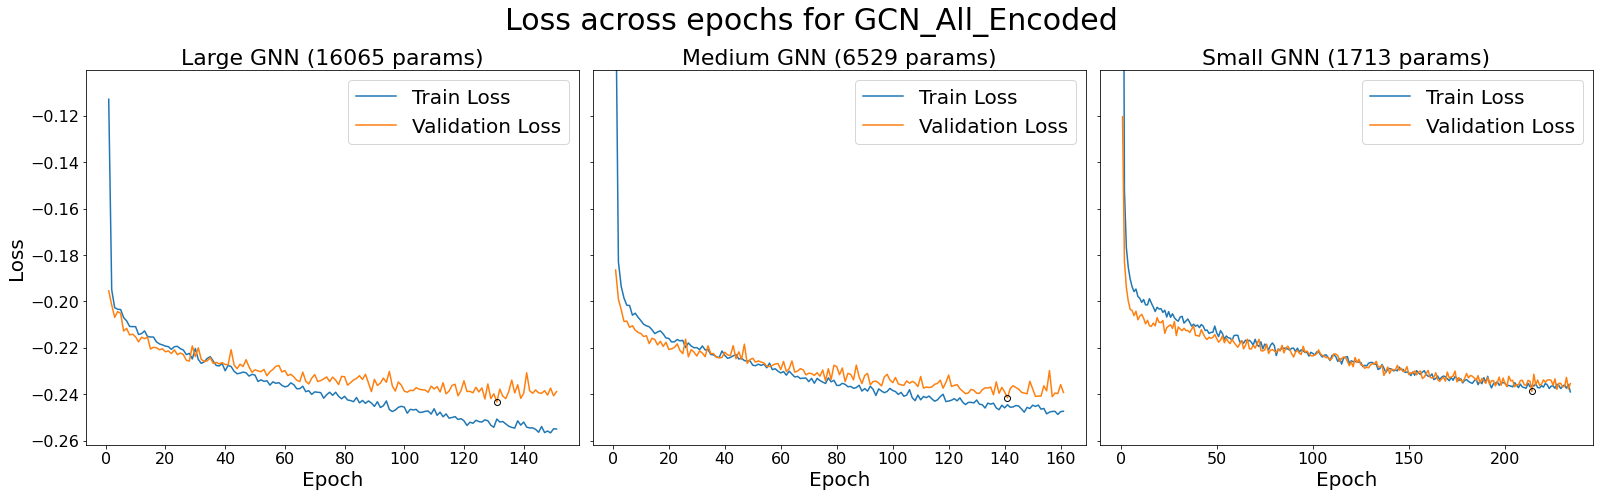

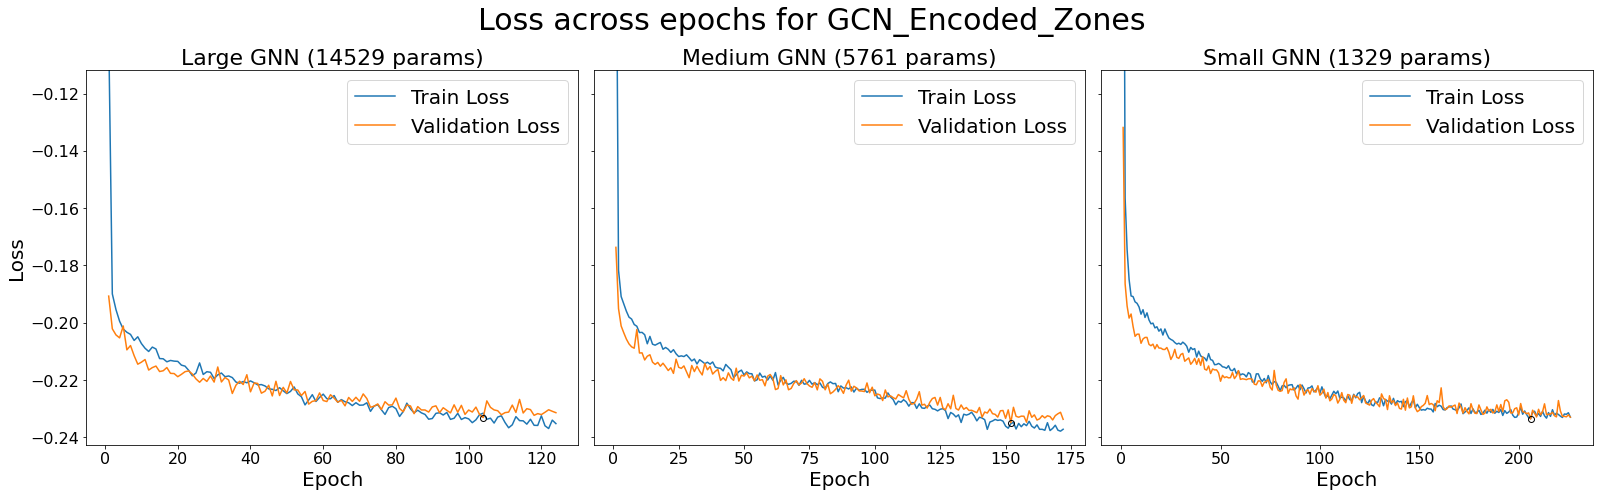

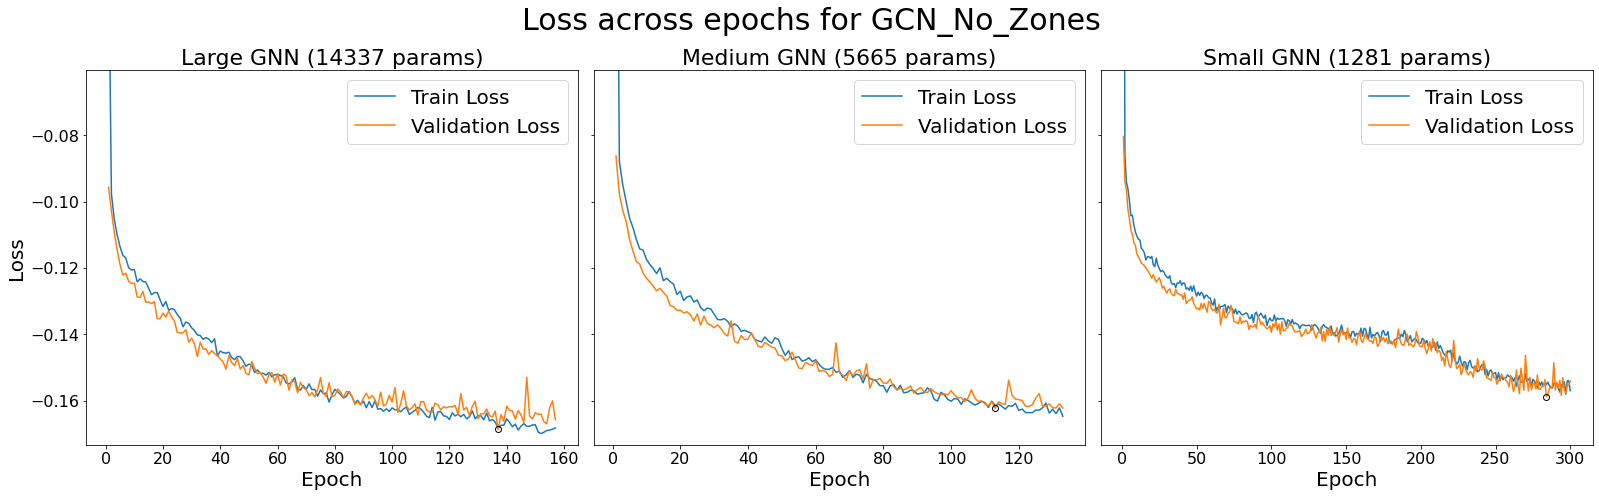

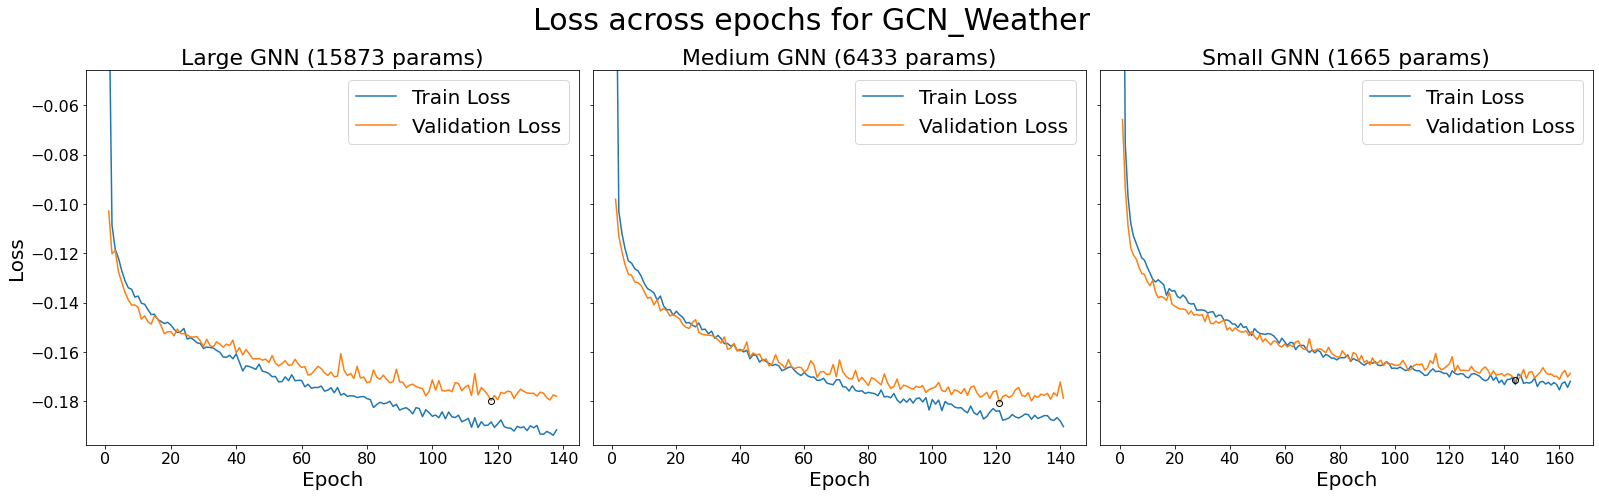

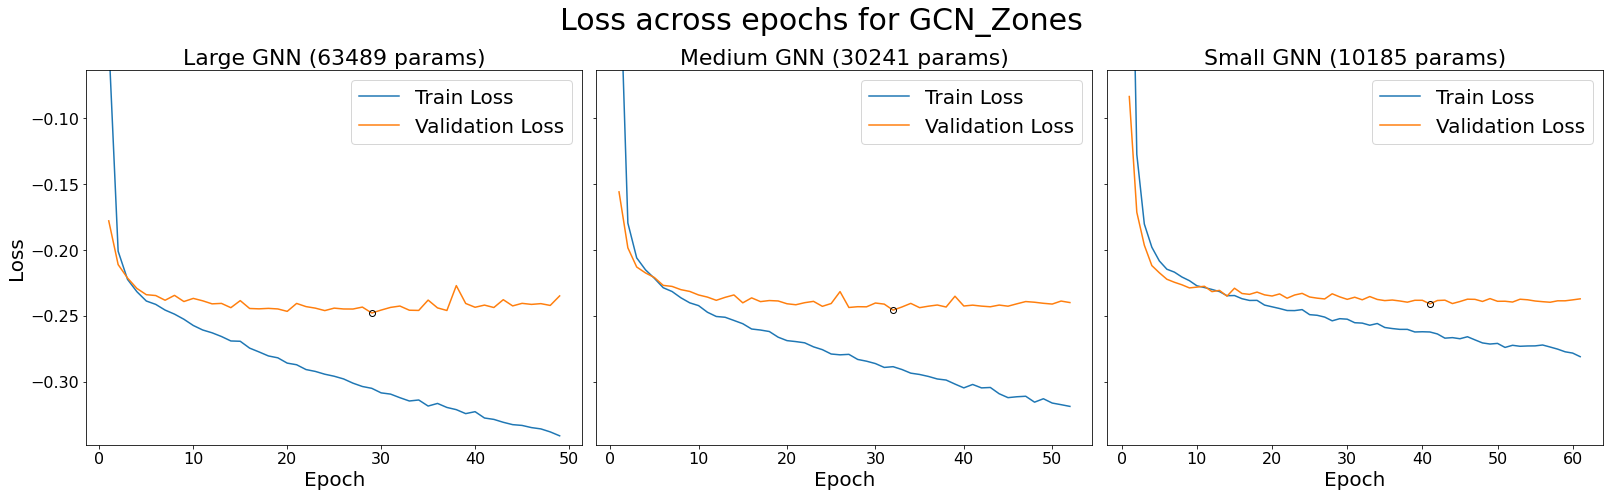

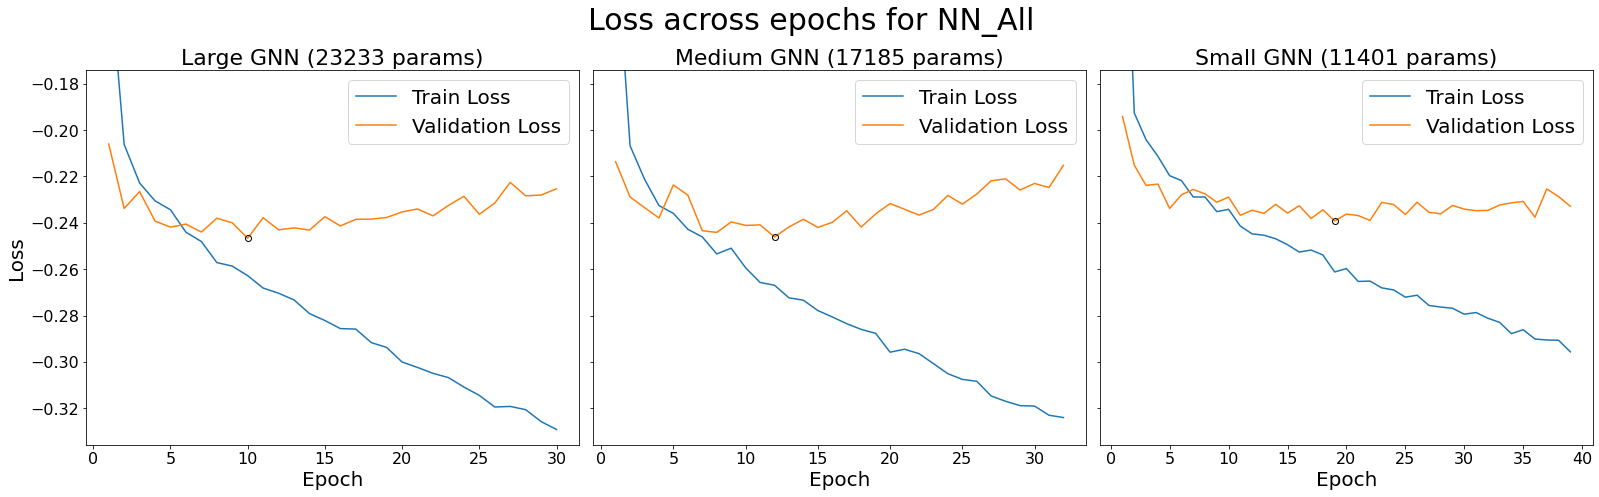

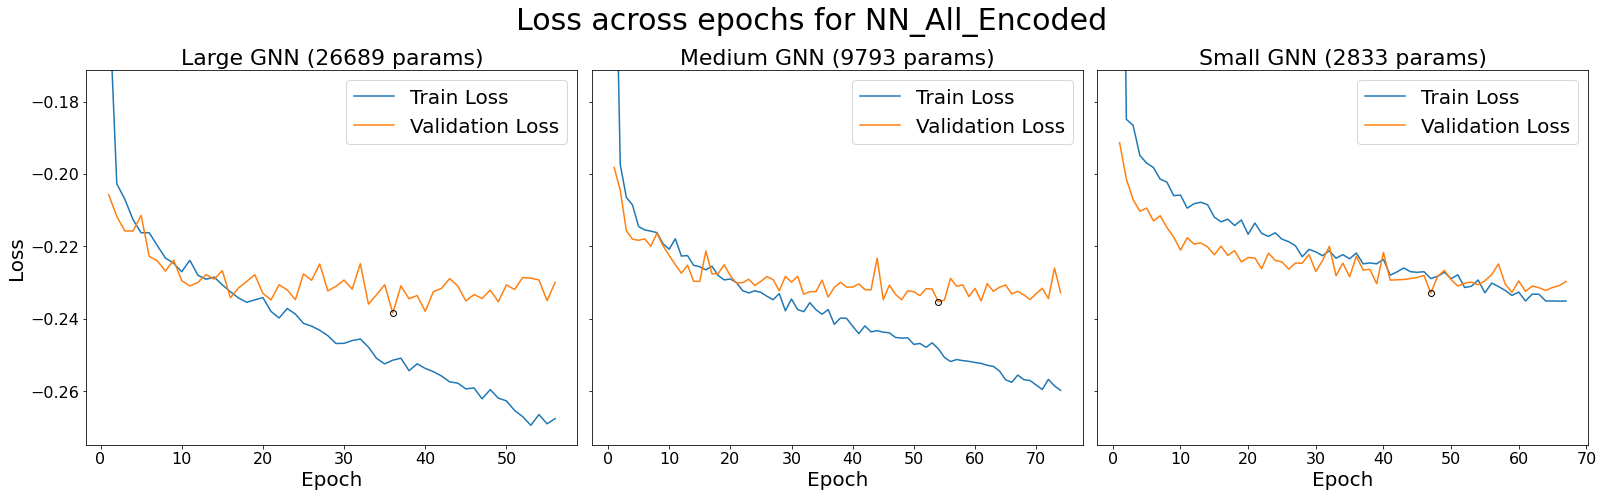

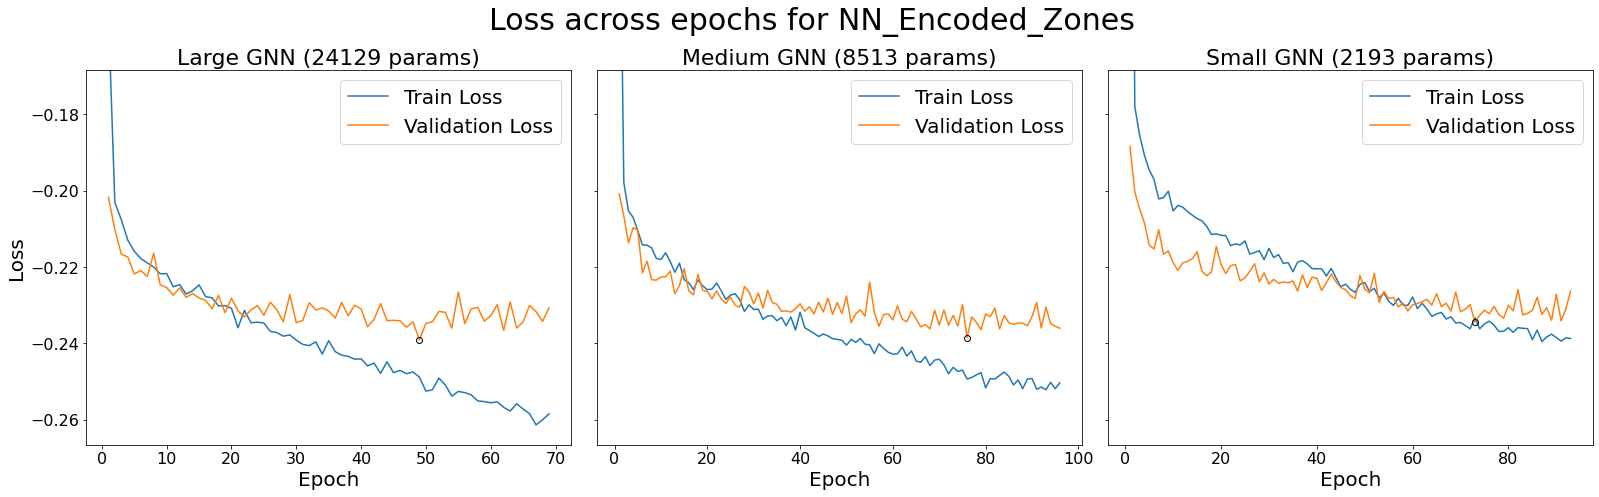

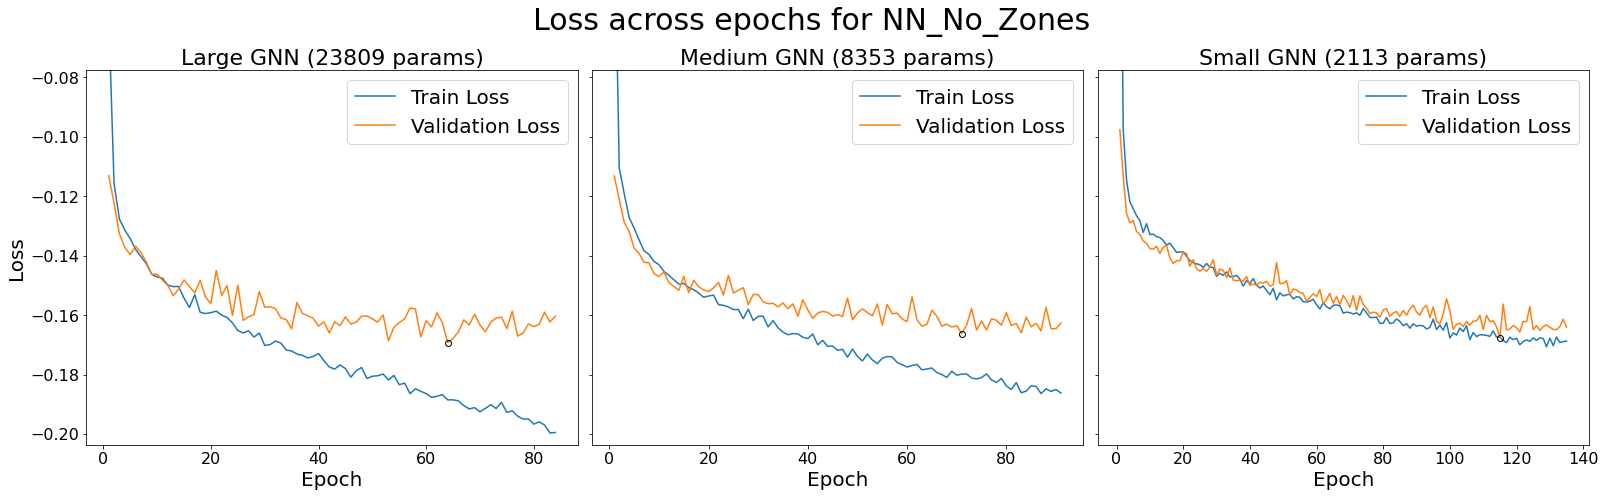

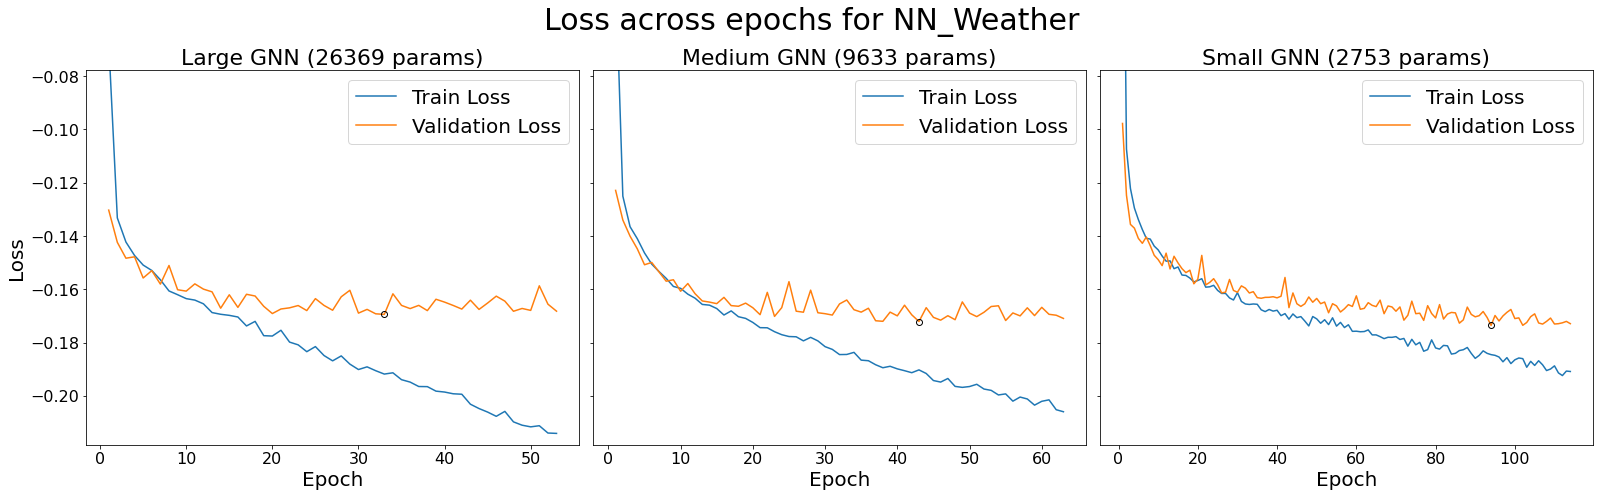

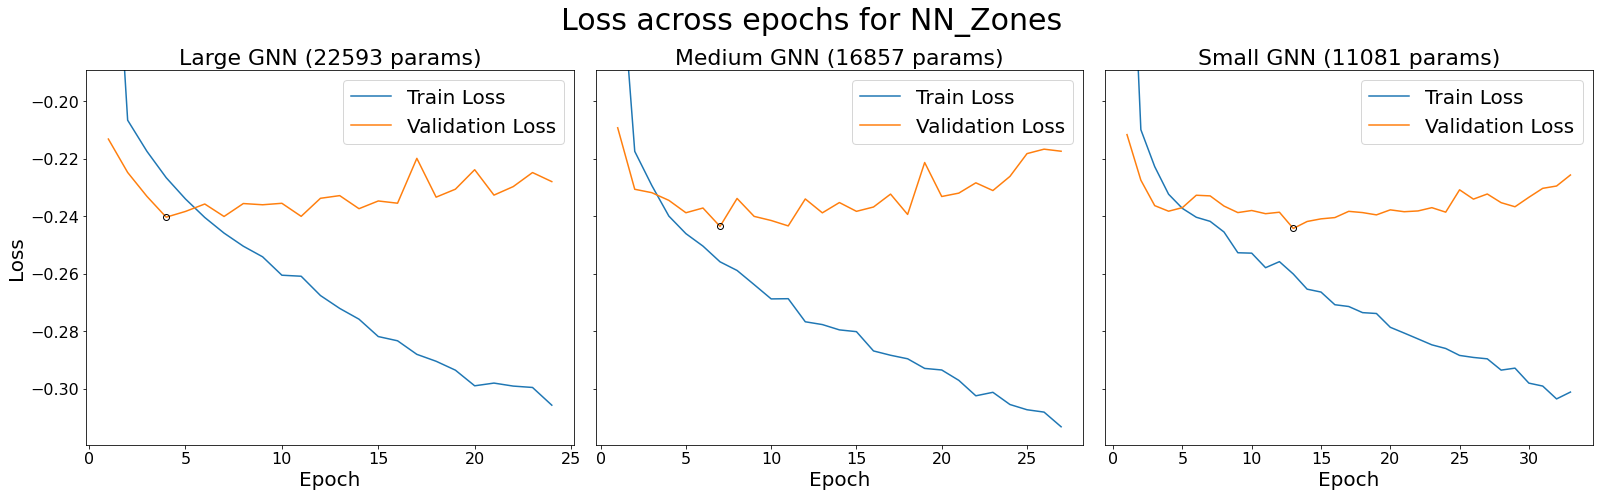

In [139]:
files = sorted([f[:-4] for f in os.listdir("Results/GNN3Sizes")])
for f in files:
    create_loss_plots(f)

## Aggregated results

In [32]:
idx = ['Mean','Std']
cols = ['No Zones', 'Add zones','Add encoded zones', 'Add weather and dist. to station','All','All encoded zones']

In [37]:
# RF,
RFR2 = np.array([
    np.array([0.1178313903706959,0.11766808129333906,0.11774941183559484, 0.11743564720702293, 0.11748025944206664]),
    np.array([0.19690526090306082,0.19733244205749134,0.1974265367928173,0.19685889264388012,0.19677989578124355]),
    np.array([0.23423990239483583,0.23432068265472772,0.23463427777436396,0.23465981921488333,0.23465118151246322]),
    np.array([0.1677902670904684,0.1686542379832453,0.16892118188476535,0.1685795318972091,0.1686518869385114]),
    np.array([0.22036315728277556,0.21991511379710094,0.2203284312486926,0.22068801880505062,0.21956598191007648]),
    np.array([0.24854253134986548,0.24833093928332461,0.24850430483250008,0.24896652352617799,0.2489534888429621])
])

print(pd.DataFrame([RFR2.mean(axis = 1)*100,RFR2.std(axis = 1)*100], index = ['Mean','Std'], columns=cols).T.to_latex())

RFF1 = np.array([
    np.array([0.11185682326621924,0.11154081009566458,0.11111111111111112,0.11036448788434128,0.11187957689178193]),
    np.array([0.27455321840898306,0.2732723256547807,0.2734017363851618,0.27453455348690436,0.273972602739726]),
    np.array([0.2882380288238029,0.2850924918389554,0.28495878052574275,0.2840714840714841,0.2869119701909641]),
    np.array([0.1862453531598513,0.19720896070510463,0.19996330948449825,0.1988261188554659,0.19735876742479824]),
    np.array([0.304635761589404,0.2999210734017364,0.2998581113037995,0.30048872773135743,0.3029065200314218]),
    np.array([0.31157315395199514,0.3121936274509804,0.3140672782874618,0.31061418287639764,0.3103289977046672])
])

print(pd.DataFrame([RFF1.mean(axis = 1),RFF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

\begin{tabular}{lrr}
\toprule
{} &       Mean &       Std \\
\midrule
No Zones                         &  11.763296 &  0.015259 \\
Add zones                        &  19.706061 &  0.026511 \\
Add encoded zones                &  23.450117 &  0.018233 \\
Add weather and dist. to station &  16.851942 &  0.038273 \\
All                              &  22.017214 &  0.039001 \\
All encoded zones                &  24.865956 &  0.025550 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &      Mean &       Std \\
\midrule
No Zones                         &  0.111351 &  0.000566 \\
Add zones                        &  0.273947 &  0.000541 \\
Add encoded zones                &  0.285855 &  0.001507 \\
Add weather and dist. to station &  0.195921 &  0.004942 \\
All                              &  0.301562 &  0.001898 \\
All encoded zones                &  0.311755 &  0.001335 \\
\bottomrule
\end{tabular}



In [78]:
print(pd.DataFrame(RFR2*100,index=cols).to_latex(header=False,float_format="%.3f"))
print(pd.DataFrame(RFF1,index=cols).to_latex(header=False,float_format="%.4f"))

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 11.783 & 11.767 & 11.775 & 11.744 & 11.748 \\
Add zones                        & 19.691 & 19.733 & 19.743 & 19.686 & 19.678 \\
Add encoded zones                & 23.424 & 23.432 & 23.463 & 23.466 & 23.465 \\
Add weather and dist. to station & 16.779 & 16.865 & 16.892 & 16.858 & 16.865 \\
All                              & 22.036 & 21.992 & 22.033 & 22.069 & 21.957 \\
All encoded zones                & 24.854 & 24.833 & 24.850 & 24.897 & 24.895 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 0.1119 & 0.1115 & 0.1111 & 0.1104 & 0.1119 \\
Add zones                        & 0.2746 & 0.2733 & 0.2734 & 0.2745 & 0.2740 \\
Add encoded zones                & 0.2882 & 0.2851 & 0.2850 & 0.2841 & 0.2869 \\
Add weather and dist. to station & 0.1862 & 0.1972 & 0.2000 & 0.1988 & 0.1974 \\
All                              & 0.3046 & 0.2999 & 0.2999 & 0.3005 & 0.3029 \\
All encoded zone

In [68]:
# MLP,
MLPR2 = np.array([
    np.array([0.11716675796854115,0.11622411190083981,0.114128641657958,0.11569533504058171,0.11716908207437582]),
    np.array([0.2377477696322997,0.23920935160127454,0.23733773839469996,0.2377756888010628,0.23770063103687245]),
    np.array([0.20893772582314518,0.21515157064111345,0.2161664806288931,0.20798856404161536,0.215840040689512]),
    np.array([0.1445258144255619,0.14637834260191063,0.14361858336764544,0.14714225107018897,0.14299816939784638]),
    np.array([0.23984796777261552,0.23900743120513313,0.23778936702620257,0.2375415960797802,0.23713479846556584]),
    np.array([0.2142957842717279,0.2135785968444327,0.2110672649933606,0.21352848296366822,0.22065869801916738])
])

print(pd.DataFrame([MLPR2.mean(axis = 1)*100,MLPR2.std(axis = 1)*100], index = ['Mean','Std'], columns=cols).T.to_latex())

MLPF1 = np.array([
    np.array([0.08630393996247654,0.09087119633180492,0.07858793864257198,0.08838857619345424,0.09470636889991729]),
    np.array([0.29372096508317097,0.29665215433118153,0.2882664647993944,0.288293710502558,0.300507311250373]),
    np.array([0.22344139650872819,0.2364920348168829,0.23690280065897856,0.2218151540383014,0.24154746423927176]),
    np.array([0.08322981366459628,0.09438202247191012,0.07913818106484358,0.09568595379268043,0.08357348703170028]),
    np.array([0.2789400278940028,0.2779418622726566,0.2759368225456798,0.275797373358349,0.27203718048024783]),
    np.array([0.233983286908078,0.22797756516001322,0.22444555611138906,0.2303630363036303,0.2410816093826356])
])

print(pd.DataFrame([MLPF1.mean(axis = 1),MLPF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex())

\begin{tabular}{lrr}
\toprule
{} &       Mean &       Std \\
\midrule
No Zones                         &  11.607679 &  0.112638 \\
Add zones                        &  23.795424 &  0.064718 \\
Add encoded zones                &  21.281688 &  0.358247 \\
Add weather and dist. to station &  14.493263 &  0.158788 \\
All                              &  23.826423 &  0.100835 \\
All encoded zones                &  21.462577 &  0.320839 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &      Mean &       Std \\
\midrule
No Zones                         &  0.087772 &  0.005377 \\
Add zones                        &  0.293488 &  0.004766 \\
Add encoded zones                &  0.232040 &  0.007904 \\
Add weather and dist. to station &  0.087202 &  0.006595 \\
All                              &  0.276131 &  0.002370 \\
All encoded zones                &  0.231570 &  0.005682 \\
\bottomrule
\end{tabular}



In [77]:
print(pd.DataFrame(MLPR2*100,index=cols).to_latex(header=False,float_format="%.3f"))
print(pd.DataFrame(MLPF1,index=cols).to_latex(header=False,float_format="%.4f"))

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 11.717 & 11.622 & 11.413 & 11.570 & 11.717 \\
Add zones                        & 23.775 & 23.921 & 23.734 & 23.778 & 23.770 \\
Add encoded zones                & 20.894 & 21.515 & 21.617 & 20.799 & 21.584 \\
Add weather and dist. to station & 14.453 & 14.638 & 14.362 & 14.714 & 14.300 \\
All                              & 23.985 & 23.901 & 23.779 & 23.754 & 23.713 \\
All encoded zones                & 21.430 & 21.358 & 21.107 & 21.353 & 22.066 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 0.0863 & 0.0909 & 0.0786 & 0.0884 & 0.0947 \\
Add zones                        & 0.2937 & 0.2967 & 0.2883 & 0.2883 & 0.3005 \\
Add encoded zones                & 0.2234 & 0.2365 & 0.2369 & 0.2218 & 0.2415 \\
Add weather and dist. to station & 0.0832 & 0.0944 & 0.0791 & 0.0957 & 0.0836 \\
All                              & 0.2789 & 0.2779 & 0.2759 & 0.2758 & 0.2720 \\
All encoded zone

In [47]:
# GCN
GCNR2 = np.array([
    np.array([0.16544017729536564,0.16376077226346109,0.16782850213318656,0.16524538235717057,0.1634306965046345]),
    np.array([0.24338523607136342,0.2406460796119324,0.23980190272251567,0.24059437683129203,0.23750946406640772]),
    np.array([0.22772401337800696,0.2269036877879087,0.22800923855820865,0.2272709746678494,0.2126668831888524,]),
    np.array([0.17948495862731084,0.17847518184490385,0.17769435305649972,0.1752245044643378,0.17707159407582396]),
    np.array([0.24219689388890375,0.24027057620789505,0.2450630498463321,0.24559302172385367,0.24653348198801794]),
    np.array([0.2338240564728692,0.2339383779318691,0.22961340160317378,0.2310235001057842,0.23240284853678894])
])

print(pd.DataFrame([GCNR2.mean(axis = 1)*100,GCNR2.std(axis = 1)*100], index = ['Mean','Std'], columns=cols).T.to_latex(float_format="%.3f"))

GCNF1 = np.array([
    np.array([0.1485299732722413,0.12298507462686567,0.1494208494208494,0.14666922633902862,0.1283359497645212]),
    np.array([0.29376443418013853,0.2846964064436183,0.3008279668813247,0.29318251299296855,0.2775856648852562]),
    np.array([0.24751669109265592,0.2421539478031054,0.25422338855174675,0.23406054456282768,0.21638902910987717]),
    np.array([0.1734637386971766,0.16057564855141074,0.14628527548473794,0.16040955631399317,0.14891575513337169]),
    np.array([0.30418590793981826,0.2775302355187778,0.3006377163680534,0.3138131426016987,0.2981514609421586]),
    np.array([0.2740752302169502,0.27884173433430365,0.24611864683771856,0.25194300518134716,0.2592652013476656])
])

print(pd.DataFrame([GCNF1.mean(axis = 1),GCNF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex(float_format="%.4f"))

\begin{tabular}{lrr}
\toprule
{} &   Mean &   Std \\
\midrule
No Zones                         & 16.514 & 0.156 \\
Add zones                        & 24.039 & 0.188 \\
Add encoded zones                & 22.451 & 0.594 \\
Add weather and dist. to station & 17.759 & 0.143 \\
All                              & 24.393 & 0.233 \\
All encoded zones                & 23.216 & 0.166 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &   Mean &    Std \\
\midrule
No Zones                         & 0.1392 & 0.0112 \\
Add zones                        & 0.2900 & 0.0080 \\
Add encoded zones                & 0.2389 & 0.0130 \\
Add weather and dist. to station & 0.1579 & 0.0097 \\
All                              & 0.2989 & 0.0119 \\
All encoded zones                & 0.2620 & 0.0126 \\
\bottomrule
\end{tabular}



In [79]:
print(pd.DataFrame(GCNR2*100,index=cols).to_latex(header=False,float_format="%.3f"))
print(pd.DataFrame(GCNF1,index=cols).to_latex(header=False,float_format="%.4f"))

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 16.544 & 16.376 & 16.783 & 16.525 & 16.343 \\
Add zones                        & 24.339 & 24.065 & 23.980 & 24.059 & 23.751 \\
Add encoded zones                & 22.772 & 22.690 & 22.801 & 22.727 & 21.267 \\
Add weather and dist. to station & 17.948 & 17.848 & 17.769 & 17.522 & 17.707 \\
All                              & 24.220 & 24.027 & 24.506 & 24.559 & 24.653 \\
All encoded zones                & 23.382 & 23.394 & 22.961 & 23.102 & 23.240 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 0.1485 & 0.1230 & 0.1494 & 0.1467 & 0.1283 \\
Add zones                        & 0.2938 & 0.2847 & 0.3008 & 0.2932 & 0.2776 \\
Add encoded zones                & 0.2475 & 0.2422 & 0.2542 & 0.2341 & 0.2164 \\
Add weather and dist. to station & 0.1735 & 0.1606 & 0.1463 & 0.1604 & 0.1489 \\
All                              & 0.3042 & 0.2775 & 0.3006 & 0.3138 & 0.2982 \\
All encoded zone

In [44]:
# GAT
GATR2 = np.array([
    np.array([0.16640547044837461,0.16462996510189587,0.1644165819762975,0.15994749739928105,0.16426003257085464]),
    np.array([0.2363727540331373,0.2397379087005822,0.2373099705345426,0.23846875575815907,0.23811221027689822]),
    np.array([0.2295938353307686,0.22922452959214856,0.23358937684600845,0.22746628719815498,0.2352066009842385]),
    np.array([0.1714123073848488,0.17591343579842833,0.18326860528543,0.1745391313615755,0.1796518321290057]),
    np.array([0.23991396956587974,0.24111804559954853,0.23936029417588767,0.23871250350120543,0.23931168083966203]),
    np.array([0.23445755620224484,0.2313215066832618,0.23259891088769435,0.23263399416823327,0.22767582292589583])
])

print(pd.DataFrame([GATR2.mean(axis = 1)*100,GATR2.std(axis = 1)*100], index = ['Mean','Std'], columns=cols).T.to_latex(float_format="%.3f"))

GATF1 = np.array([
    np.array([0.13187243200939153,0.13031496062992126,0.11748251748251748,0.11002591189954157,0.15419415645617343]),
    np.array([0.26176994013913607,0.30395578824898195,0.290575127973502,0.27817670933499844,0.2928691403267675]),
    np.array([0.24602649006622518,0.2479258174719375,0.2630906768837803,0.2403419365444682,0.26344430217669657]),
    np.array([0.16075471698113208,0.17257376136574504,0.17940688892982132,0.179519595448799,0.18211559432933477]),
    np.array([0.28918189991009885,0.2774021072495676,0.2902687110976165,0.2700741441867802,0.28848738241003435]),
    np.array([0.2770670826833074,0.27235086643152895,0.2542290961817303,0.2579705453956951,0.24633624238432406])
])

print(pd.DataFrame([GATF1.mean(axis = 1),GATF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex(float_format="%.4f"))

\begin{tabular}{lrr}
\toprule
{} &    Mean &    Std \\
\midrule
No Zones                         & 16.3932 & 0.2137 \\
Add zones                        & 23.8000 & 0.1129 \\
Add encoded zones                & 23.1016 & 0.2899 \\
Add weather and dist. to station & 17.6957 & 0.4118 \\
All                              & 23.9683 & 0.0812 \\
All encoded zones                & 23.1738 & 0.2263 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &   Mean &    Std \\
\midrule
No Zones                         & 0.1288 & 0.0151 \\
Add zones                        & 0.2855 & 0.0144 \\
Add encoded zones                & 0.2522 & 0.0094 \\
Add weather and dist. to station & 0.1749 & 0.0077 \\
All                              & 0.2831 & 0.0080 \\
All encoded zones                & 0.2616 & 0.0114 \\
\bottomrule
\end{tabular}



In [80]:
print(pd.DataFrame(GATR2*100,index=cols).to_latex(header=False,float_format="%.3f"))
print(pd.DataFrame(GATF1,index=cols).to_latex(header=False,float_format="%.4f"))

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 16.641 & 16.463 & 16.442 & 15.995 & 16.426 \\
Add zones                        & 23.637 & 23.974 & 23.731 & 23.847 & 23.811 \\
Add encoded zones                & 22.959 & 22.922 & 23.359 & 22.747 & 23.521 \\
Add weather and dist. to station & 17.141 & 17.591 & 18.327 & 17.454 & 17.965 \\
All                              & 23.991 & 24.112 & 23.936 & 23.871 & 23.931 \\
All encoded zones                & 23.446 & 23.132 & 23.260 & 23.263 & 22.768 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 0.1319 & 0.1303 & 0.1175 & 0.1100 & 0.1542 \\
Add zones                        & 0.2618 & 0.3040 & 0.2906 & 0.2782 & 0.2929 \\
Add encoded zones                & 0.2460 & 0.2479 & 0.2631 & 0.2403 & 0.2634 \\
Add weather and dist. to station & 0.1608 & 0.1726 & 0.1794 & 0.1795 & 0.1821 \\
All                              & 0.2892 & 0.2774 & 0.2903 & 0.2701 & 0.2885 \\
All encoded zone

In [65]:
# NNC
NNCR2 = np.array([
    np.array([0.16764068822314504,0.16753929302886428,0.16893082722272823,0.16870865151400805,0.16775411564998577]),
    np.array([0.23312824160810808,0.2380511500885456,0.23848628969750896,0.23886039606154286,0.2409535812792044]),
    np.array([0.22972012850082568,0.23138189733153047,0.2319813020788487,0.23245217787965122,0.23031984994370558]),
    np.array([0.17715758149961258,0.17906499777394658,0.17524986938159315,0.1790337744178686,0.1796919097659121]),
    np.array([0.23926698812641933,0.2414556861114442,0.23984405496606886,0.24229952612425698,0.2386123738932736]),
    np.array([0.23026558341608483,0.22781932442070907,0.23372626536362062,0.2321850979623995,0.2282765215787228])
])

print(pd.DataFrame([NNCR2.mean(axis = 1)*100,NNCR2.std(axis = 1)*100], index = ['Mean','Std'], columns=cols).T.to_latex(float_format="%.3f"))

NNCF1 = np.array([
    np.array([0.19404284967775648,0.14920273348519364,0.15230536659108088,0.16378187232458588,0.15568862275449102]),
    np.array([0.24979072492884652,0.28611764705882353,0.25977884139296914,0.26703172813657594,0.26156141223272]),
    np.array([0.23886506103596175,0.2578049565497264,0.24829157175398636,0.25121871953201164,0.23618343692256002]),
    np.array([0.17788286649690796,0.20484503028143927,0.16275605214152697,0.19407300325262017,0.18478852786349606]),
    np.array([0.27349073047060685,0.28263283108643933,0.2780311369712219,0.2844963688032839,0.26467241099008293]),
    np.array([0.28533254156769594,0.28325916832898573,0.27667493796526055,0.2847447169520284,0.2559765815579769])
])

print(pd.DataFrame([NNCF1.mean(axis = 1),NNCF1.std(axis = 1)], index = ['Mean','Std'], columns=cols).T.to_latex(float_format="%.4f"))

\begin{tabular}{lrr}
\toprule
{} &   Mean &   Std \\
\midrule
No Zones                         & 16.811 & 0.058 \\
Add zones                        & 23.790 & 0.258 \\
Add encoded zones                & 23.117 & 0.102 \\
Add weather and dist. to station & 17.804 & 0.163 \\
All                              & 24.030 & 0.138 \\
All encoded zones                & 23.045 & 0.225 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrr}
\toprule
{} &   Mean &    Std \\
\midrule
No Zones                         & 0.1630 & 0.0163 \\
Add zones                        & 0.2649 & 0.0120 \\
Add encoded zones                & 0.2465 & 0.0080 \\
Add weather and dist. to station & 0.1849 & 0.0143 \\
All                              & 0.2767 & 0.0071 \\
All encoded zones                & 0.2772 & 0.0110 \\
\bottomrule
\end{tabular}



In [81]:
print(pd.DataFrame(NNCR2*100,index=cols).to_latex(header=False,float_format="%.3f"))
print(pd.DataFrame(NNCF1,index=cols).to_latex(header=False,float_format="%.4f"))

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 16.764 & 16.754 & 16.893 & 16.871 & 16.775 \\
Add zones                        & 23.313 & 23.805 & 23.849 & 23.886 & 24.095 \\
Add encoded zones                & 22.972 & 23.138 & 23.198 & 23.245 & 23.032 \\
Add weather and dist. to station & 17.716 & 17.906 & 17.525 & 17.903 & 17.969 \\
All                              & 23.927 & 24.146 & 23.984 & 24.230 & 23.861 \\
All encoded zones                & 23.027 & 22.782 & 23.373 & 23.219 & 22.828 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrr}
\toprule
No Zones                         & 0.1940 & 0.1492 & 0.1523 & 0.1638 & 0.1557 \\
Add zones                        & 0.2498 & 0.2861 & 0.2598 & 0.2670 & 0.2616 \\
Add encoded zones                & 0.2389 & 0.2578 & 0.2483 & 0.2512 & 0.2362 \\
Add weather and dist. to station & 0.1779 & 0.2048 & 0.1628 & 0.1941 & 0.1848 \\
All                              & 0.2735 & 0.2826 & 0.2780 & 0.2845 & 0.2647 \\
All encoded zone

## Encode zones benchmark

In [53]:
import sys
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, classification_report
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import time

df_full = pd.read_csv('data/processed/SimpleNNData.csv', index_col=0, parse_dates = [1]).sort_values(by = 'time')
y = df_full.time_to_reservation

# Load weather
Weather_Scale = pd.read_csv('data/processed/MinMaxWeather.csv', index_col=0)
weather_var = list(Weather_Scale.index)

# Load slicing
with open("data/processed/Sample_CC", "rb") as fp: 
    cc = pickle.load(fp)
train_idx = np.concatenate(cc[:2])
test_idx = cc[2]


def cv(pipe, parameters, X_train, y_train, cf = 4):    
    """
    Performs paramter tunning using cross-validation on a specifed pipe object.
    """
    # perform cross validaiton over the input parameters
    cv_select = GridSearchCV(
        estimator=pipe, 
        param_grid=parameters, 
        scoring='r2', 
        n_jobs=-4,
        return_train_score=True,
        verbose=2, 
        cv=cf
    )
    cv_select.fit(X_train, y_train)
    
    return(cv_select)

with open("data/processed/Sample_NC", "rb") as fp: 
    nc = pickle.load(fp)

# For classification
Clas_Coef = dict(pd.concat([df_full.time.dt.hour.iloc[np.concatenate(cc[:2])],df_full.time_to_reservation.iloc[np.concatenate(cc[:2])]], axis = 1).groupby('time')['time_to_reservation'].mean()*2)
df_clas = pd.concat([df_full.time.dt.hour.iloc[cc[2]],df_full.time_to_reservation.iloc[cc[2]]], axis = 1)
df_clas['Cut'] = df_clas.time.map(dict(Clas_Coef))
df_full.drop(columns=['time_to_reservation', 'hour_index', 'time'], inplace=True)

# Normalization
df_full['leave_fuel'] = df_full['leave_fuel']/100
df_full['degree'] = df_full['degree']/50
df_full['dist_to_station'] = df_full['dist_to_station']/5000
df_full[weather_var] = (df_full[weather_var] - Weather_Scale['Min'])/Weather_Scale['diff']

# Function for scores
def score_model(model, X_train, X_test, y_train, y_test, df_clas = df_clas):
    preds = model.predict(X_test)
    print('')
    print(f'R2 of training: {r2_score(y_train,model.predict(X_train))}')
    print(f'R2 of test: {r2_score(y_test,preds)}')
    df_clas['Preds'] = preds
    print(classification_report(df_clas.time_to_reservation > df_clas.Cut, df_clas.Preds > df_clas.Cut, target_names = ['Under','Over'], zero_division = 0))
    print('----------------------------------------------')
    print('')
    print('')

In [58]:
# Prep data
df = df_full.drop(columns =  weather_var + ['dist_to_station'])
X_train = df.iloc[train_idx]
y_train = y.iloc[train_idx]
X_test = df.iloc[test_idx]
y_test = y.iloc[test_idx]

# Encode zones
Mean_Zone_Times = dict(pd.DataFrame({'Zone': X_train.filter(regex = 'lz').idxmax(axis = 1).values, 'Time':y_train.values}).groupby('Zone').mean().squeeze())

X_train['Zone_E'] = X_train.filter(regex = 'lz').idxmax(1).map(Mean_Zone_Times)
X_test['Zone_E'] = X_test.filter(regex = 'lz').idxmax(1).map(Mean_Zone_Times)
X_train.drop(columns = X_train.filter(regex = 'lz'), inplace = True)
X_test.drop(columns =  X_test.filter(regex = 'lz'), inplace = True)

print('R2:', {r2_score(y_test,X_test['Zone_E'])})
print(classification_report(df_clas.time_to_reservation > df_clas.Cut, X_test['Zone_E'] > df_clas.Cut, target_names = ['Under','Over'], zero_division = 0))

/var/folders/3z/pggbcw7949507j0lbw1gjngc0000gn/T/ipykernel_23323/3592077081.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Zone_E'] = X_train.filter(regex = 'lz').idxmax(1).map(Mean_Zone_Times)
/var/folders/3z/pggbcw7949507j0lbw1gjngc0000gn/T/ipykernel_23323/3592077081.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Zone_E'] = X_test.filter(regex = 'lz').idxmax(1).map(Mean_Zone_Times)


R2: {0.0853358508413895}
              precision    recall  f1-score   support

       Under       0.87      0.92      0.90     26725
        Over       0.27      0.18      0.22      4420

    accuracy                           0.82     31145
   macro avg       0.57      0.55      0.56     31145
weighted avg       0.79      0.82      0.80     31145



/opt/anaconda3/envs/GNN_env/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
